# Question 8 - Code

In [188]:
import numpy as np

y = np.arange(-20, 20.1, 0.1)

y_new = np.reshape(y, (-1,1))

p = np.arange(1,51)

y_final = y_new ** p

y_final.shape

import pandas as pd
print(pd.DataFrame(y_final).head(22))

      0       1         2            3             4             5   \
0  -20.0  400.00 -8000.000  160000.0000 -3.200000e+06  6.400000e+07   
1  -19.9  396.01 -7880.599  156823.9201 -3.120796e+06  6.210384e+07   
2  -19.8  392.04 -7762.392  153695.3616 -3.043168e+06  6.025473e+07   
3  -19.7  388.09 -7645.373  150613.8481 -2.967093e+06  5.845173e+07   
4  -19.6  384.16 -7529.536  147578.9056 -2.892547e+06  5.669391e+07   
5  -19.5  380.25 -7414.875  144590.0625 -2.819506e+06  5.498037e+07   
6  -19.4  376.36 -7301.384  141646.8496 -2.747949e+06  5.331021e+07   
7  -19.3  372.49 -7189.057  138748.8001 -2.677852e+06  5.168254e+07   
8  -19.2  368.64 -7077.888  135895.4496 -2.609193e+06  5.009650e+07   
9  -19.1  364.81 -6967.871  133086.3361 -2.541949e+06  4.855123e+07   
10 -19.0  361.00 -6859.000  130321.0000 -2.476099e+06  4.704588e+07   
11 -18.9  357.21 -6751.269  127598.9841 -2.411621e+06  4.557963e+07   
12 -18.8  353.44 -6644.672  124919.8336 -2.348493e+06  4.415167e+07   
13 -18

In [190]:
import random
import numpy as np
import pandas as pd
from data_process import get_CIFAR10_data
%matplotlib inline
from save_submission import output_submission_csv

In [12]:
cd-

/Users/vinay/Downloads/CODE_ASSIGNMENT-2/code_masters


# Loading CIFAR-10

In the following cells we determine the number of images for each split and load the images.
<br /> 
TRAIN_IMAGES + VAL_IMAGES = (0, 50000]
, TEST_IMAGES = 10000

In [191]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 40000
VAL_IMAGES = 10000

In [192]:
data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES)
X_train_CIFAR, y_train_CIFAR = data['X_train'], data['y_train']
X_val_CIFAR, y_val_CIFAR = data['X_val'], data['y_val']
X_test_CIFAR, y_test_CIFAR = data['X_test'], data['y_test']
n_class_CIFAR = len(np.unique(y_test_CIFAR))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


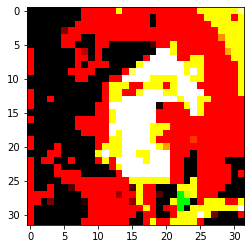

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
img = X_train_CIFAR[0].T
plt.imshow(img)
plt.show()

Convert the sets of images from dimensions of **(N, 3, 32, 32) -> (N, 3072)** where N is the number of images so that each **3x32x32** image is represented by a single vector.

In [194]:
X_train_CIFAR = np.reshape(X_train_CIFAR, (X_train_CIFAR.shape[0], -1))
X_val_CIFAR = np.reshape(X_val_CIFAR, (X_val_CIFAR.shape[0], -1))
X_test_CIFAR = np.reshape(X_test_CIFAR, (X_test_CIFAR.shape[0], -1))

In [195]:
X_train_CIFAR = X_train_CIFAR.T
X_val_CIFAR = X_val_CIFAR.T
X_test_CIFAR = X_test_CIFAR.T
#y_train_CIFAR.shape

In [196]:
#X_train_CIFAR.shape
y_train_CIFAR.shape

(40000,)

# Get Accuracy
This function computes how well your model performs using accuracy as a metric.


In [81]:
def get_acc(pred, y_test):
    return np.sum(y_test==pred)/len(y_test)*100

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.


The following code: 
- Creates an instance of the Perceptron classifier class 
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


# Model Perceptron

In [197]:
import numpy as np
import math

m,n = 50000, 3072


class Perceptron:
    def __init__(self, n_class: int, lr: float, epochs: int):
        """Initialize a new classifier.
        Parameters:
            n_class: the number of classes
            lr: the learning rate
            epochs: the number of epochs to train for
        """
        #self.w = ###### TODO: change this
        self.lr = 0.1 ###### TODO: change this
        self.epochs = 500 ###### TODO: change this
        self.n_class = 10 ###### TODO: change this
        
    def init_params(self):
        W1 = np.random.rand(10, 3072) 
        b1 = np.random.rand(10, 1) 
        W2 = np.random.rand(10, 10) 
        b2 = np.random.rand(10, 1)
        return W1, b1, W2, b2
    
    def sigmoid(self, x): 
        x = x / np.linalg.norm(x, axis=-1)[:, np.newaxis]
        return 1 / (1 + np.exp(-x))
   
    def ReLU(self,Z):
        return np.maximum(Z, 0)
    
    def ReLU_deriv(self,Z):
        return Z > 0
    
    def softmax(self, Z):
        Z = Z / np.linalg.norm(Z, axis=-1)[:, np.newaxis]
        #b = x.max()
        #y = np.exp(x - b)
        #return y / y.sum()
        #b = np.max(Z)
        #print(b)
        A = np.exp(Z) / np.sum(np.exp(Z), axis = 0)
        return A
    
    def forward_prop(self, W1, b1, W2, b2, X):
        Z1 = W1.dot(X) + b1
        A1 = self.sigmoid(Z1)
        Z2 = W2.dot(A1) + b2
        A2 = self.softmax(Z2)
        return Z1, A1, Z2, A2
    
    def d_sigmoid(self,x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def one_hot(self,Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def backward_prop(self,Z1, A1, Z2, A2, W1, W2, X, Y):
        one_hot_Y = self.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * self.d_sigmoid(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        return dW1, db1, dW2, db2

    def update_params(self,W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2    
        return W1, b1, W2, b2
    
    def get_predictions(self,A2):
        return np.argmax(A2, 0)

    def get_accuracy(self,predictions, Y):
        print(predictions, Y)
        return np.sum(predictions == Y) / Y.size

    def gradient_descent(self,X, Y, alpha, iterations):
        W1, b1, W2, b2 = self.init_params()
        for i in range(iterations):
            Z1, A1, Z2, A2 = self.forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = self.backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = self.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            if i % 100 == 0:
                print("Iteration: ", i)
                predictions = self.get_predictions(A2)
                print(self.get_accuracy(predictions[0:20], Y[0:20]))
        return W1, b1, W2, b2
    
    def make_predictions(self, X, W1, b1, W2, b2):
        _, _, _, A2 = self.forward_prop(W1, b1, W2, b2, X)
        predictions = self.get_predictions(A2)
        return predictions

    def train(self, X_train: np.ndarray, y_train: np.ndarray):
        """Train the classifier.
        Use the perceptron update rule as introduced in Lecture 3.
        Parameters:
            X_train: a number array of shape (N, D) containing training data;
                N examples with D dimensions
            y_train: a numpy array of shape (N,) containing training labels
        """
        N, D = X_train.shape
        self.w = np.random.randn(self.n_class, D)

        ###### YOUR CODE STARTS HERE ######
        
        
        ###### YOUR CODE ENDS HERE ######
        pass

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """Use the trained weights to predict labels for test data points.
        Parameters:
            X_test: a numpy array of shape (N, D) containing testing data;
                N examples with D dimensions
        Returns:
            predicted labels for the data in X_test; a 1-dimensional array of
                length N, where each element is an integer giving the predicted
                class.
        """
        N, D = X_test.shape
        y_test = np.zeros(N)
        ###### YOUR CODE STARTS HERE ######
        
        
        ###### YOUR CODE ENDS HERE ######
        return y_test

## Train Perceptron on CIFAR

In [198]:
lr = 0.10
n_epochs = 300

percept_CIFAR = Perceptron(n_class_CIFAR, lr, n_epochs)
percept_CIFAR.train(X_train_CIFAR, y_train_CIFAR)

In [202]:
#W1, b1, W2, b2 = percept_CIFAR.init_params()
W1, b1, W2, b2 = percept_CIFAR.gradient_descent(X_train_CIFAR, y_train_CIFAR, 0.1, 300)

Iteration:  0
[2 0 0 2 2 2 3 9 0 2 2 0 0 2 2 0 0 2 0 6] [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
0.1
Iteration:  100
[3 8 9 3 9 6 9 3 8 6 3 9 9 3 6 8 9 3 9 3] [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
0.2
Iteration:  200
[3 8 9 3 9 6 9 3 8 6 3 9 9 3 6 8 9 3 9 3] [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
0.2


In [419]:
pred_percept = percept_CIFAR.make_predictions(X_train_CIFAR, W1, b1, W2,b2)
print('The training accuracy is given by: %f' % (percept_CIFAR.get_accuracy(pred_percept, y_train_CIFAR)))

[6 1 9 ... 6 6 8] [6 9 9 ... 6 2 8]
The training accuracy is given by: 0.230450


### Validate Perceptron on CIFAR

In [420]:
#pred_percept = percept_CIFAR.predict(X_val_CIFAR)
pred_percept = percept_CIFAR.make_predictions(X_val_CIFAR, W1, b1, W2,b2)
print('The validation accuracy is given by: %f' % (percept_CIFAR.get_accuracy(pred_percept, y_val_CIFAR)))

[8 9 6 ... 9 8 9] [1 8 5 ... 9 1 1]
The validation accuracy is given by: 0.229200


### Test Perceptron on CIFAR

In [421]:
#pred_percept = percept_CIFAR.predict(X_test_CIFAR)
pred_percept = percept_CIFAR.make_predictions(X_test_CIFAR, W1, b1, W2,b2)
print('The testing accuracy is given by: %f' % (percept_CIFAR.get_accuracy(pred_percept, y_test_CIFAR)))

[1 8 9 ... 6 5 2] [3 8 8 ... 5 1 7]
The testing accuracy is given by: 0.225400


In [422]:
output_submission_csv('output/Logistic_submission_CIFAR.csv', percept_CIFAR.make_predictions(X_test_CIFAR, W1, b1, W2,b2))

In [203]:
print(W1,b1,W2,b2)

[[-11.21406357 -11.78636608 -11.36196327 ...  -7.56834684  -7.59687153
   -6.93935082]
 [ 13.57416059  12.65174839  12.41624402 ...   7.27947691   7.94933754
    8.70727979]
 [ -6.70405859  -7.04760649  -7.14564484 ...  -8.48014283  -9.00626848
   -9.20176036]
 ...
 [ -8.29755954  -8.34232033  -8.38392656 ...   1.8192661    1.94478639
    1.61436531]
 [  6.88007412   6.61176602   6.85998517 ...   4.96544125   5.65935087
    5.62090773]
 [ -5.67041771  -5.93298387  -5.58096302 ...  -0.52091587  -0.56222367
   -0.54264689]] [[0.2999621 ]
 [0.40607213]
 [0.89867707]
 [0.58226169]
 [0.98484278]
 [0.93450001]
 [0.29606003]
 [0.36394464]
 [0.58248334]
 [0.49155373]] [[ 0.31584263  0.39678317  0.02153293  0.29042804  0.29518918  0.44086653
   0.59446156  0.61096509  0.49307123  0.84100518]
 [ 0.462843    0.82663057  0.30258412  0.42795132  0.08722559  0.54729296
   0.71207545  0.94253756  0.94939981  0.39800928]
 [ 0.12110392  0.23132688  0.46968062  0.72204645  0.79309322  0.25454739
   0.14

# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Number of Epochs** - As described for perceptron.




The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

In [183]:
X_train_CIFAR.shape

(3072, 40000)

In [209]:
"""Logistic regression model."""

import numpy as np
import math


class Logistic:
    def __init__(self, lr: float, epochs: int):
        """Initialize a new classifier.
        Parameters:
            lr: the learning rate
            epochs: the number of epochs to train for
        """
        self.w = None
        self.lr = lr
        self.epochs = epochs
        self.threshold = 0.5
        
    def sigmoid(self, x: np.ndarray) -> np.ndarray:
        """Sigmoid function.
        Parameters:
            z: the input
        Returns:
            the sigmoid of the input
        """
        ##### YOUR CODE STARTS HERE #####
        # x = x / np.linalg.norm(x, axis=-1)[:, np.newaxis]
        x = x / np.linalg.norm(x, axis=-1)[:, np.newaxis]
        return 1 / (1 + np.exp(-x))
        
        ##### YOUR CODE ENDS HERE #####
        
    def train(self, X_train: np.ndarray, y_train: np.ndarray, epochs, lr):
        """Train the classifier.
        Use the logistic regression update rule as introduced in lecture.
        Parameters:
            X_train: a numpy array of shape (N, D) containing training data;
                N examples with D dimensions
            y_train: a numpy array of shape (N,) containing training labels
        """
        D, N = X_train.shape
        self.w = np.random.randn(1, D)
        self.bias = 0
        
        #GD
        for _ in range(self.epochs):
            linear_model = np.dot(self.w, X_train) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
           # self.predict(X_train, y_train, self.threshold)
            
            dw = (1/N) * np.dot((y_predicted - y_train), X_train.T)
            db = (1/N) * np.sum(y_predicted - y_train)
            
            self.w -= self.lr * dw
            self.bias -= self.lr * db

        ##### YOUR CODE STARTS HERE #####
        
        
        ##### YOUR CODE ENDS HERE #####
        pass

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """Use the trained weights to predict labels for test data points.
        Parameters:
            X_test: a numpy array of shape (N, D) containing testing data;
                N examples with D dimensions
        Returns:
            predicted labels for the data in X_test; a 1-dimensional array of
                length N, where each element is an integer giving the predicted
                class.
        """
        N, D = X_test.shape
        y_test = np.zeros(N)
        ##### YOUR CODE STARTS HERE #####
        
        linear_model = np.dot(self.w , X_test) + self.bias
        y_predicted = self.sigmoid(linear_model)
        
        y_predicted = y_predicted.T
        
        print(y_predicted.shape)
        
        y_predicted_class = [1 if i > self.threshold else 0 for i in y_predicted]
        
       # print(self.get_accuracy(y_predicted_class, y_train))
        print(self.w, self.bias)
        
        
        
        ##### YOUR CODE ENDS HERE #####
        return y_predicted_class
    
    def get_accuracy(self,predictions, Y):
        print(predictions[0:20], Y[0:20])
        return np.sum(predictions == Y) / Y.size

In [210]:
#y_train_CIFAR[0:20]
#y_train_CIFAR = np.where(y_train_CIFAR == 9, 1, 0)
#y_train_CIFAR[0:20]


### Training Logistic Classifer

In [211]:
learning_rate = 0.1
n_epochs = 1000

lr = Logistic(learning_rate, n_epochs)
lr.train(X_train_CIFAR, y_train_CIFAR,learning_rate, n_epochs)

In [212]:
pred_lr = lr.predict(X_train_CIFAR)
print('The training accuracy is given by: %f' % (lr.get_accuracy(pred_lr, y_train_CIFAR)))

(40000, 1)
[[1519.42782942 1463.97561257 1437.05939166 ... -971.8228928
  -866.7251691  -778.77115549]] 399.9499991851483
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0] [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6]
The training accuracy is given by: 0.123425


### Validate Logistic Classifer

In [174]:
pred_lr = lr.predict(X_val_CIFAR)
print('The validation accuracy is given by: %f' % (lr.get_accuracy(pred_lr, y_val_CIFAR)))

(10000, 1)
[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1] [1 8 5 1 5 7 4 3 8 2 7 2 0 1 5 9 6 2 0 8]
The validation accuracy is given by: 0.123900


### Test Logistic Classifier

In [171]:
pred_lr = lr.predict(X_test_CIFAR)
print('The testing accuracy is given by: %f' % (lr.get_accuracy(pred_lr, y_test_CIFAR)))

(10000, 1)
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0] [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
The testing accuracy is given by: 0.128100


In [175]:
output_submission_csv('output/Logistic_Regression_submission_CIFAR.csv', lr.predict(X_test_CIFAR))

(10000, 1)
